In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "darkgrid")

%matplotlib inline
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("Course Advisory Project Data - results_scores (1).csv")
data.head()

,Session_O,Semester_O,RegNo_ID,CourseCode_O,Scores_O,Units_O
0,2013,1,19.0,EEE309,51,3.0
1,2013,1,2.0,EEE309,53,3.0
2,2013,1,537.0,EEE309,45,3.0
3,2013,1,11.0,EEE301,55,3.0
4,2013,1,802.0,SEP001,0,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94278 entries, 0 to 94277
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Session_O     94278 non-null  int64  
 1   Semester_O    94278 non-null  int64  
 2   RegNo_ID      94252 non-null  float64
 3   CourseCode_O  94278 non-null  object 
 4   Scores_O      89623 non-null  object 
 5   Units_O       94277 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.3+ MB


In [4]:
data.isnull().sum()

Session_O          0
Semester_O         0
RegNo_ID          26
CourseCode_O       0
Scores_O        4655
Units_O            1
dtype: int64

In [5]:
data["Semester_O"].value_counts()

1    51677
2    42596
0        5
Name: Semester_O, dtype: int64

In [6]:

data["RegNo_ID"] = data["RegNo_ID"].fillna(99999)
data["RegNo_ID"] = data["RegNo_ID"].astype(int)

# Dealing with the coursecode field 

In [7]:
# to list all the courses, sort them inorder to get the elective courses
a = data["CourseCode_O"].unique()
a.sort()
a

array(['AGE202', 'AGE302', 'CHE201', 'CHE305', 'CHE306', 'CHM101',
       'CHM102', 'CHM103', 'CHM104', 'CHM205', 'CHM207', 'CPE203',
       'CPE204', 'CPE206', 'CPE301', 'CPE303', 'CPE309', 'CPE310',
       'CPE314', 'CPE316', 'CPE401', 'CPE405', 'CPE409', 'CPE502',
       'CPE503', 'CPE504', 'CPE506', 'CPE508', 'CPE509', 'CPE510',
       'CPE511', 'CPE517', 'CPE521', 'CSC101', 'CSC102', 'CSC200',
       'CSC201', 'CSC202', 'CSC300', 'CSC302', 'CSC304', 'CSC305',
       'CSC306', 'CSC307', 'CSC308', 'CSC311', 'CSC312', 'CSC315',
       'CSC317', 'CSC400', 'CSC401', 'CSC403', 'CSC405', 'CSC407',
       'CSC415', 'CSC501', 'CSC502', 'CSC503', 'CSC504', 'CSC505',
       'CSC506', 'CSC507', 'CSC508', 'CSC509', 'CSC511', 'CSC513',
       'CSC514', 'CSC515', 'CSC517', 'CSC520', 'CSC521', 'CSC522',
       'CSC523', 'CSC524', 'CVE202', 'CVE401', 'CVE410', 'ECN201',
       'ECN202', 'ECN203', 'ECN204', 'ECN301', 'ECN302', 'ECN313',
       'ECN314', 'ECN401', 'ECN421', 'EEE201', 'EEE202', 'EEE2

### To Delete all electives from the dataset as they do not add to GPA of a student

In [8]:
elective = ['SEA001', 'SEA002','SED001', 'SEE001', 'SEE002', 'SEG001', 'SEG002', 'SEH001',
       'SEH002', 'SEL001', 'SEL002', 'SEM001', 'SEM002', 'SEO001','SEO002', 'SEO003',
        'SEO004', 'SEP001', 'SEP002', 'SER001','SER002',]

In [9]:
data_elective = data[data["CourseCode_O"].isin(elective)]
data_elective = data_elective.index
data = data.drop(data_elective)


## Dealing with the scores field

In [10]:
# filling with 0 initially, inorder to perform some calculations, so we can replace with the mean score later

data["Scores_O"] = data["Scores_O"].fillna("0")


In [11]:
scores = data["Scores_O"].unique()
scores

array(['51', '53', '45', '55', '21', '61', '46', '52', '54', '35', '50',
       '70', '56', '62', '71', '36', '77', '60', '68', '58', '57', '72',
       '65', '64', '63', '40', '41', '67', '33', '29', '25', '47', '48',
       '0', '73', '34', '9', '42', '30', '43', '22', '76', '75', '82',
       '78', '80', '87', '38', '26', '79', '84', '85', '74', '27', '66',
       '83', '81', '28', '20', '31', '92', '86', '90', '13', '10', '15',
       '88', '89', '19', '7', '24', '4', '17', '32', '69', '5', '23',
       '59', '11', '44', '49', '8', '12', '2', '91', '1', '18', '6', '16',
       '14', '39', '96', '97', '94', '93', 'S', '37', '95', 'AB', 'ab',
       '3', '98', '99', '-'], dtype=object)

In [12]:
# to check for the values that are not numbers in the list

no_int = [y for y in scores if not(y.isdigit() or y[0]== "-" and y[1:].isdigit())]
no_int

['S', 'AB', 'ab', '-']

In [13]:
# to replace all non-integer values with 0 in data["Scores_O"] and change the datatype to integer 
# so we can replace with the mean score later

x = []
for i in data["Scores_O"]:
    if i in (no_int):
        x.append(0)
    else:
        x.append(i)
        
data['Scores_O'] = x        
data["Scores_O"] = data["Scores_O"].astype(int)

In [14]:
# Replacing all 0 values with the mean of the score data

a = round(data["Scores_O"].mean())

data["Scores_O"] = data["Scores_O"].replace([0], a)

In [15]:
data["Scores_O"].unique()

array([51, 53, 45, 55, 21, 61, 46, 52, 54, 35, 50, 70, 56, 62, 71, 36, 77,
       60, 68, 58, 57, 72, 65, 64, 63, 40, 41, 67, 33, 29, 25, 47, 48, 73,
       34,  9, 42, 30, 43, 22, 76, 75, 82, 78, 80, 87, 38, 26, 79, 84, 85,
       74, 27, 66, 83, 81, 28, 20, 31, 92, 86, 90, 13, 10, 15, 88, 89, 19,
        7, 24,  4, 17, 32, 69,  5, 23, 59, 11, 44, 49,  8, 12,  2, 91,  1,
       18,  6, 16, 14, 39, 96, 97, 94, 93, 37, 95,  3, 98, 99])

In [16]:
data.isnull().sum()

Session_O       0
Semester_O      0
RegNo_ID        0
CourseCode_O    0
Scores_O        0
Units_O         0
dtype: int64

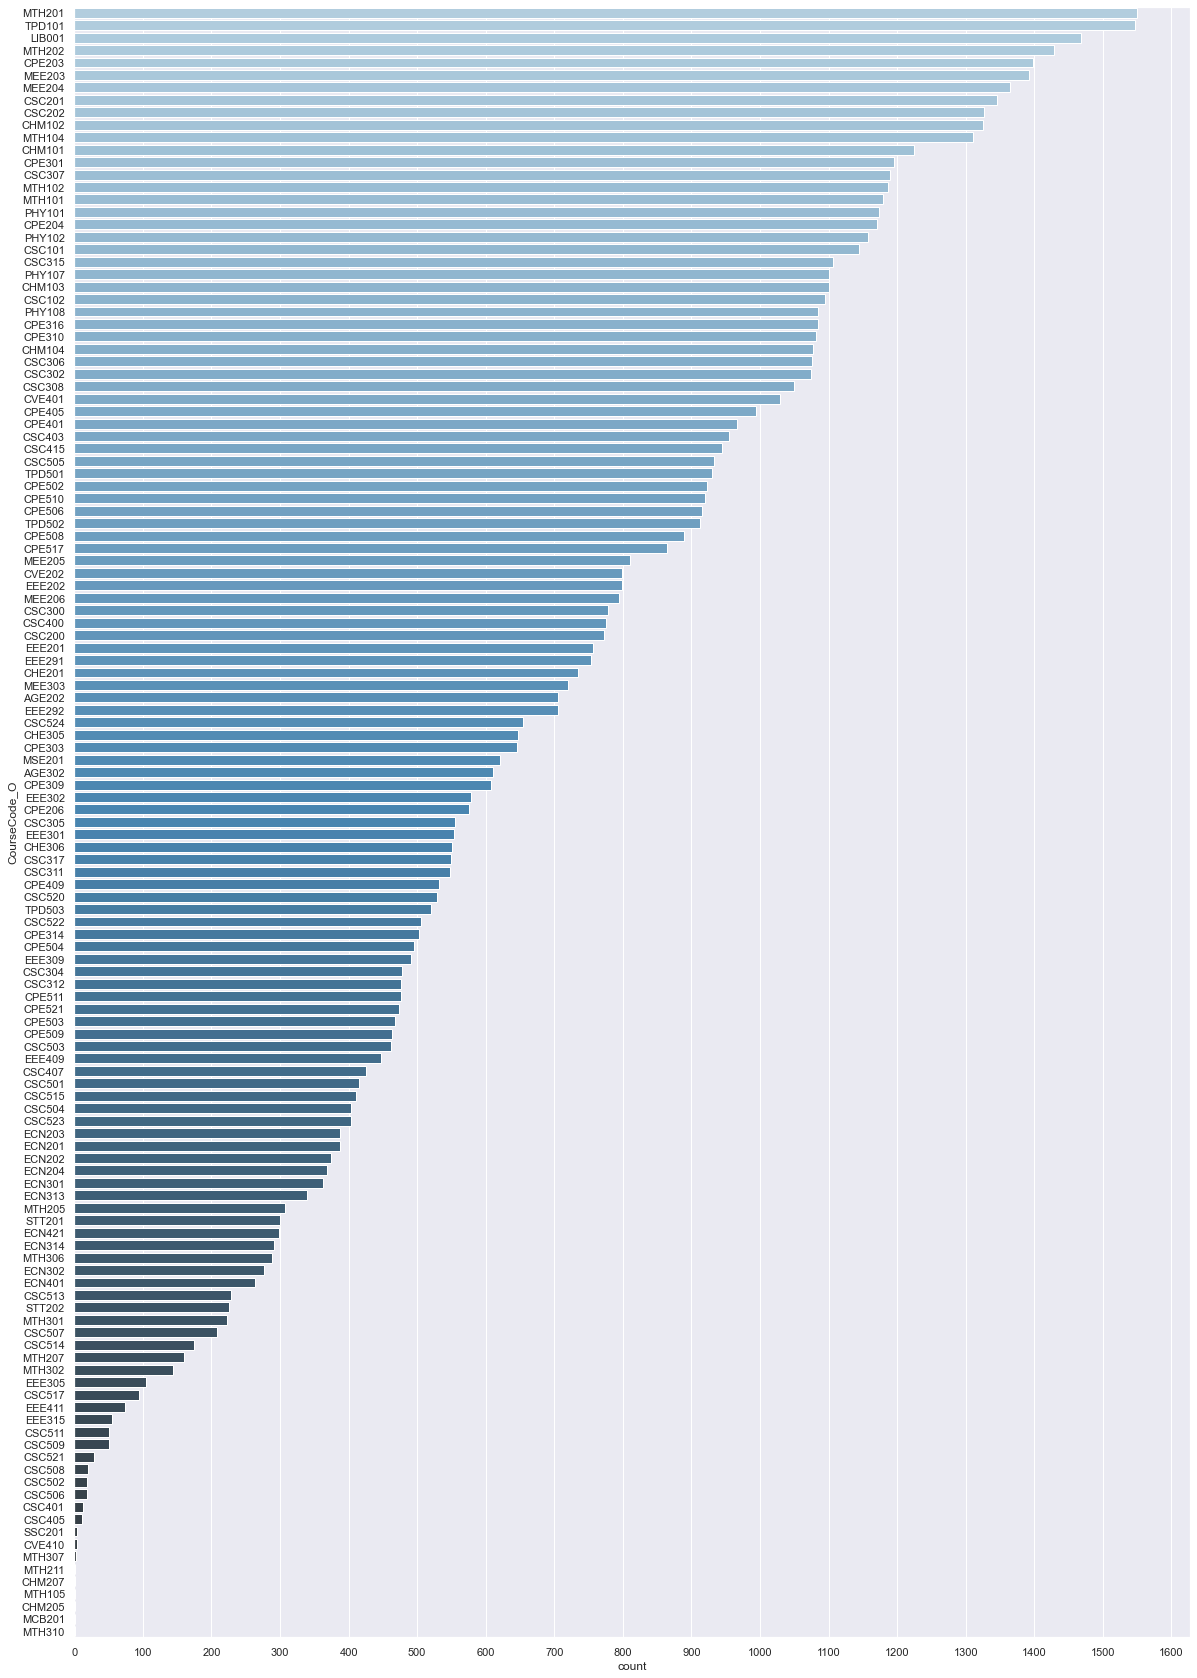

In [17]:
fig, ax = plt.subplots(figsize = (20,30))
# plt.xticks(rotation = 90) 
plt.xticks(np.arange(0, 3000, step=100)) 
sns.countplot(y = data["CourseCode_O"], order =data["CourseCode_O"].value_counts().index, palette = "Blues_d" )


from the chart, we can see he top 10 courses offered where 
*MTH201    1550
TPD101    1547
LIB001    1468
MTH202    1428
CPE203    1398
MEE203    1392
MEE204    1364
CSC201    1345
CSC202    1327
CHM102    1325

In [18]:
# df = data.groupby(["CourseCode_O", "RegNo_ID"])
# df.first()

### To get the highest and lowest score for each course

In [19]:
courses = data["CourseCode_O"].unique()
courses

array(['EEE309', 'EEE301', 'CHM102', 'PHY108', 'PHY102', 'MTH102',
       'CSC102', 'CHM104', 'MTH104', 'CSC308', 'CSC306', 'TPD502',
       'CPE316', 'CSC315', 'CSC311', 'CSC307', 'CSC305', 'CPE301',
       'CSC317', 'EEE409', 'MEE206', 'PHY101', 'ECN203', 'MTH101',
       'CSC202', 'CPE303', 'MEE303', 'CPE309', 'MEE205', 'MEE203',
       'CPE310', 'CPE203', 'LIB001', 'MEE204', 'CSC101', 'CHM103',
       'CHM101', 'TPD101', 'PHY107', 'STT201', 'MTH205', 'MTH201',
       'CHE201', 'ECN201', 'EEE291', 'ECN202', 'EEE201', 'MTH301',
       'ECN313', 'ECN301', 'MSE201', 'CHE305', 'EEE315', 'CSC201',
       'CSC200', 'AGE302', 'AGE202', 'CSC400', 'CSC300', 'CPE504',
       'CSC504', 'MTH306', 'CPE204', 'ECN204', 'CVE202', 'EEE302',
       'CSC501', 'CSC517', 'CSC521', 'CSC505', 'CSC509', 'CSC511',
       'CSC507', 'CSC415', 'ECN421', 'CVE401', 'CSC503', 'CSC523',
       'TPD501', 'CSC515', 'CSC405', 'CPE405', 'CPE401', 'TPD503',
       'MTH207', 'CSC407', 'CSC513', 'ECN401', 'CSC403', 'CPE4

Method 1

In [20]:
max_score = []
min_score = []
for i in courses:
    data_by_course = data[data["CourseCode_O"] == i ]
    max_score.append(max(data_by_course["Scores_O"]))
    min_score.append(min(data_by_course["Scores_O"]))
    

In [21]:
course_by_score = pd.DataFrame({"Courses": courses,'Highest_score' : max_score, 
                                'Lowest_score' : min_score})
course_by_score = course_by_score.sort_values(by = "Highest_score", ascending = False)
course_by_score

,Courses,Highest_score,Lowest_score
36,CHM101,99,6
23,MTH101,99,3
42,CHE201,99,1
31,CPE203,98,5
93,CPE314,98,7
28,MEE205,97,3
20,MEE206,97,3
35,CHM103,97,26
121,CPE509,96,12
9,CSC308,96,5


Method 2

In [22]:
# to get the max value of each course

table = pd.pivot_table(data,index=['CourseCode_O'],aggfunc={'Scores_O':np.max})
table


,Scores_O
CourseCode_O,
AGE202,85
AGE302,87
CHE201,99
CHE305,88
CHE306,94
CHM101,99
CHM102,88
CHM103,97
CHM104,95


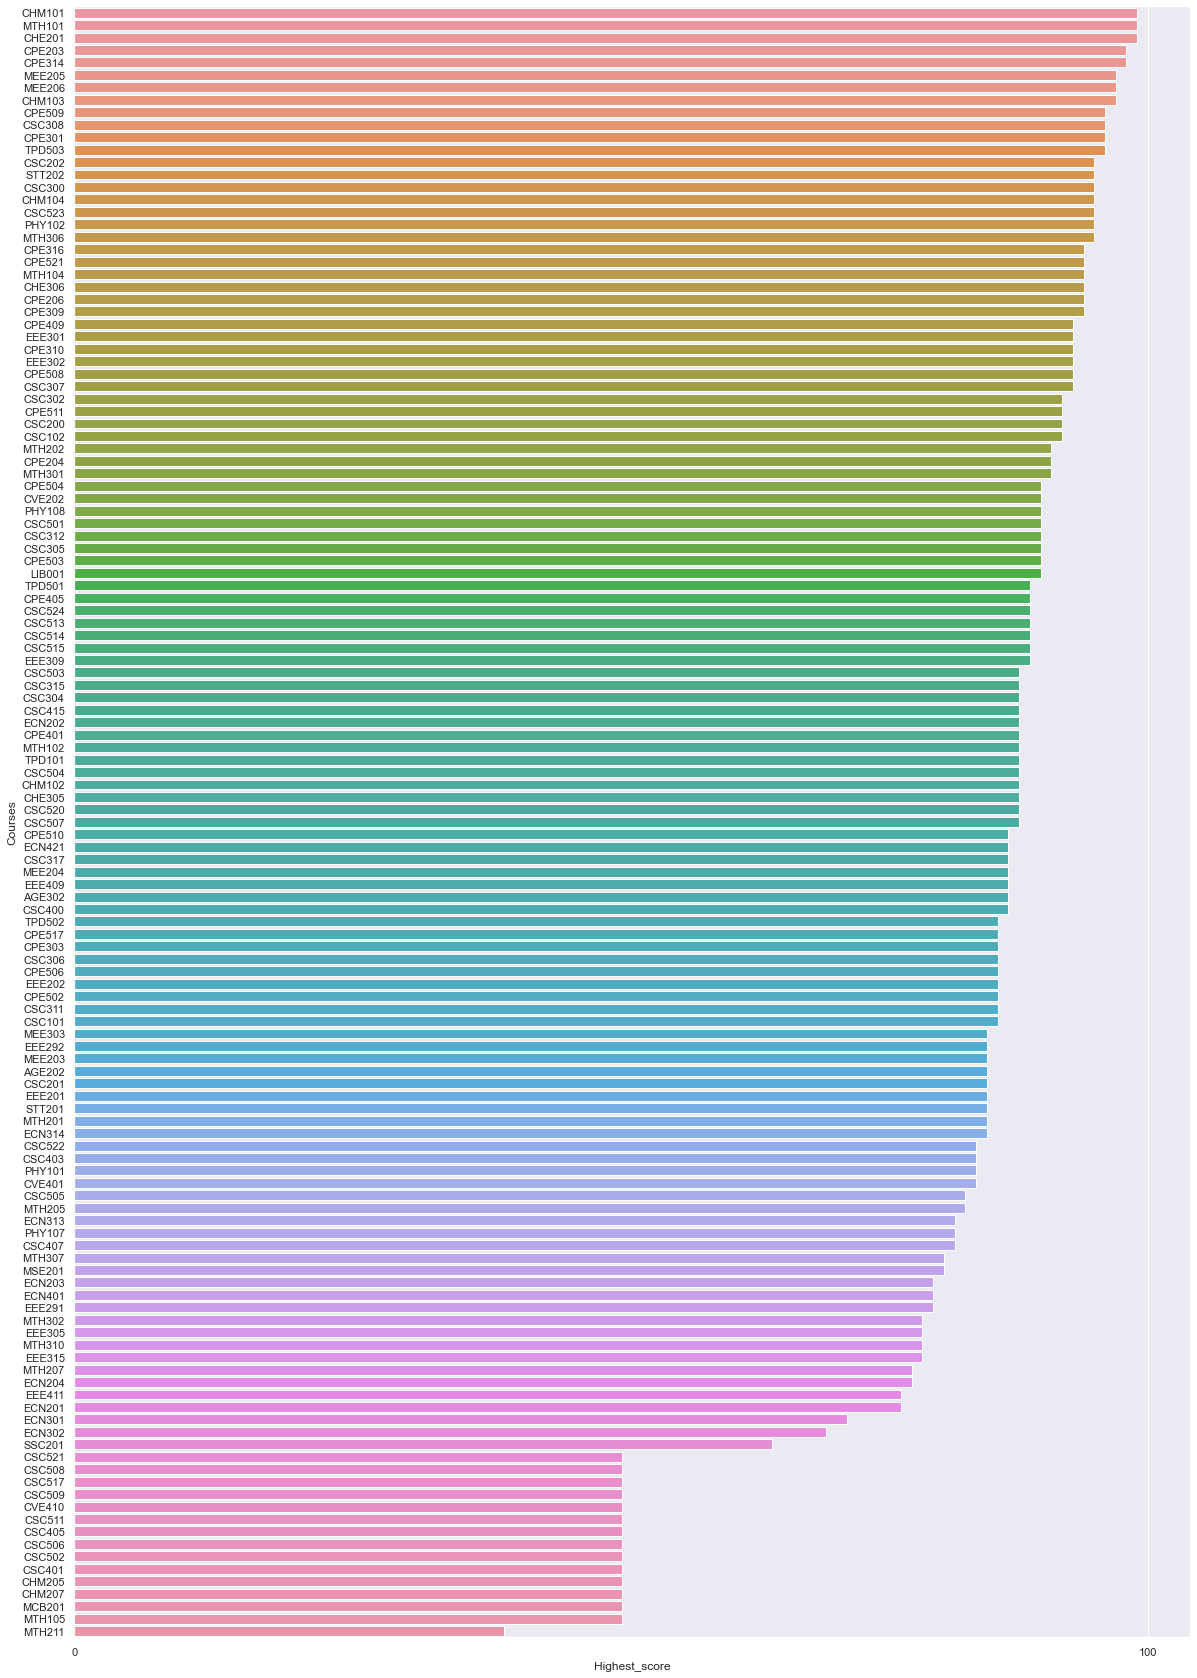

In [23]:
fig, ax = plt.subplots(figsize = (20,30))

plt.xticks(np.arange(0, 3000, step=100)) 

sns.barplot(y ="Courses", x = "Highest_score", data = course_by_score)